In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('fakenewsdata/train.csv')
data.head(5)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [4]:
data = data.dropna()
data

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [6]:
messages = data.copy()
messages.reset_index(inplace=True)
messages.head(3)

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1


In [9]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re

In [8]:
obj_lemm = WordNetLemmatizer()

In [10]:
corpus = []

for i in range(len(messages)):
    review = re.sub('[^a-zA-Z]'," ",messages['title'][i])
    review = review.lower()
    review = review.split()
    review = [obj_lemm.lemmatize(word) for word in review if word not in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

## Appying TF-IDF(Term frequency- inverse document frequency)

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [83]:
CV = TfidfVectorizer(max_features=4000)


X = CV.fit_transform(corpus).toarray()
X.shape

(1, 11)

In [18]:
y = messages['label']
y.head(3)

0    1
1    0
2    1
Name: label, dtype: int64

## train test split

In [19]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,_y_test = train_test_split(X,y,test_size=0.20,random_state=0)

In [20]:
print('X_train shape >>>> : ',X_train.shape)
print('X_test shape >>>> : ',X_test.shape)
print('y_train shape >>>> : ',y_train.shape)
print('y_test shape >>>> : ',X_test.shape)

X_train shape >>>> :  (14628, 4000)
X_test shape >>>> :  (3657, 4000)
y_train shape >>>> :  (14628,)
y_test shape >>>> :  (3657, 4000)


In [26]:
train_df = pd.DataFrame(X_train,columns=(CV.get_feature_names_out()))
train_df.head(10)

,aaron,ab,abandon,abandoned,abbas,abc,abduction,abe,abedin,able,...,youtube,yr,zealand,zero,zika,zionist,zone,zoo,zu,zuckerberg
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
import matplotlib.pyplot as plt

In [28]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## mulitnomial navie bayes with hyperparamers

In [30]:
from sklearn.naive_bayes import MultinomialNB

In [31]:
from sklearn import metrics
import numpy as np
import itertools

In [32]:
mnb_classifier = MultinomialNB(alpha=0.1)

/home/akshay/anaconda3/envs/pyNlp/lib/python3.12/site-packages/sklearn/naive_bayes.py:890: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/home/akshay/anaconda3/envs/pyNlp/lib/python3.12/site-packages/sklearn/utils/extmath.py:208: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


accuracy :0.5578342904019689 , alpha :0.0
accuracy :0.8578069455838119 , alpha :0.1
accuracy :0.8602679792179382 , alpha :0.2
accuracy :0.8635493573967733 , alpha :0.30000000000000004
accuracy :0.8660103910308996 , alpha :0.4
accuracy :0.8668307355756084 , alpha :0.5
accuracy :0.8665572873940388 , alpha :0.6000000000000001
accuracy :0.8673776319387476 , alpha :0.7000000000000001
accuracy :0.86573694284933 , alpha :0.8
accuracy :0.8654634946677605 , alpha :0.9
accuracy :0.8640962537599125 , alpha :1.0
accuracy :0.8643697019414821 , alpha :1.1
accuracy :0.8638228055783429 , alpha :1.2000000000000002
accuracy :0.8638228055783429 , alpha :1.3
accuracy :0.8635493573967733 , alpha :1.4000000000000001
accuracy :0.8621821164889254 , alpha :1.5
accuracy :0.8624555646704949 , alpha :1.6
accuracy :0.8616352201257862 , alpha :1.7000000000000002
accuracy :0.8616352201257862 , alpha :1.8
accuracy :0.8613617719442166 , alpha :1.9000000000000001
Confusion matrix, without normalization


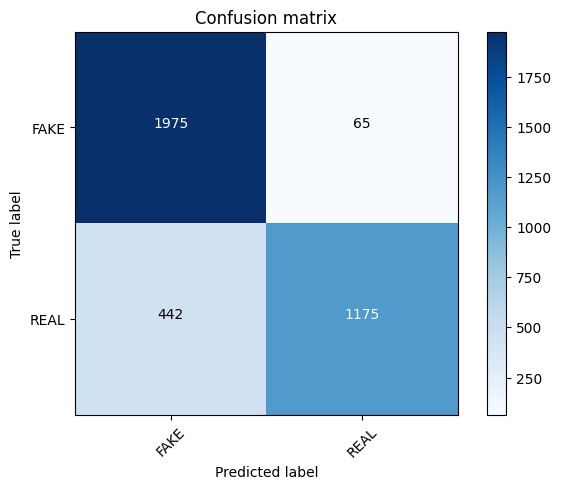

In [34]:
previous_acc_score = 0
for alpha in np.arange(0,2,0.1):
    sub_classifier = MultinomialNB(alpha=alpha)
    sub_classifier.fit(X_train,y_train)
    y_pred = sub_classifier.predict(X_test)
    acc_score = metrics.accuracy_score(_y_test,y_pred)
    if acc_score > previous_acc_score:
        mnb_classifier = sub_classifier
    print(f'accuracy :{acc_score} , alpha :{alpha}')
cm = metrics.confusion_matrix(_y_test,y_pred)
plot_confusion_matrix(cm ,classes=['FAKE','REAL'])



In [39]:
joblib.dump(mnb_classifier,'models/tf_idf_MulitnomialFakeNewsClassifier.pkl')

['models/tf_idf_MulitnomialFakeNewsClassifier.pkl']

## Passive aggressive classifier

In [35]:
from sklearn.linear_model import PassiveAggressiveClassifier

In [36]:
pa_classifier = PassiveAggressiveClassifier(max_iter=100)

In [54]:
X_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

accuracy >>>> : 0.9015586546349467
Confusion matrix, without normalization


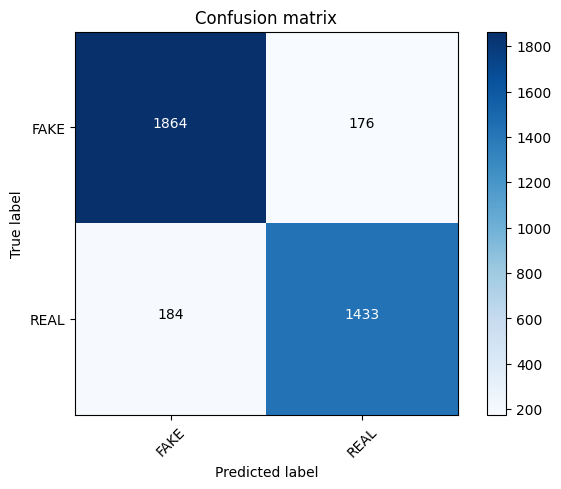

In [37]:
pa_classifier.fit(X_train,y_train)
y_pred = pa_classifier.predict(X_test)
accuracy = metrics.accuracy_score(_y_test,y_pred)
print('accuracy >>>> :',accuracy)
cm = metrics.confusion_matrix(_y_test,y_pred)
plot_confusion_matrix(cm,classes=['FAKE','REAL'])


In [38]:
import joblib
joblib.dump(pa_classifier,'models/tf_idf_passiveAgressiveFakeNewsClassifier.pkl')

['models/tf_idf_passiveAgressiveFakeNewsClassifier.pkl']

In [73]:
test_data = pd.read_csv('fakenewsdata/test.csv')
# test_data['title'][0]
test_data.head()

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


In [52]:
corpus = []
# testing with custom data
news = re.sub('[^a-zA-Z]',' ',test_data['title'][0])
news = news.lower()
news = news.split()
news = [obj_lemm.lemmatize(word) for word in news if word not in stopwords.words('english')]
news = ' '.join(news)
corpus.append(news)




corpus.append

['specter trump loosens tongue purse string silicon valley new york time']


array([[0.30151134, 0.30151134, 0.30151134, 0.30151134, 0.30151134,
        0.30151134, 0.30151134, 0.30151134, 0.30151134, 0.30151134,
        0.30151134]])

In [99]:

def preprocess_and_predict(text, vectorizer, model):
    # Preprocess the text
    review = re.sub('[^a-zA-Z]', " ", text)
    review = review.lower()
    review = review.split()
    review = [obj_lemm.lemmatize(word) for word in review if word not in stopwords.words('english')]
    review = ' '.join(review)
    print(review)
    
    # Vectorize the text using the same vectorizer fitted on the training data / load the vectorizer
    vectorizer = joblib.load(vectorizer)
    text_vector = vectorizer.transform([review]).toarray()
    
    # Ensure the text_vector has the same number of features
    required_features = vectorizer.max_features
    current_features = text_vector.shape[1]
    
    if current_features < required_features:
        # Pad the vector with zeros to reach the required number of features
        text_vector = np.pad(text_vector, ((0, 0), (0, required_features - current_features)), 'constant')
    
    # Predict using the model
    # Load model
    model = joblib.load(pa_classifier_locally)
    prediction = model.predict(text_vector)
    print(prediction)
    if prediction == 1:
        return 'Real news'
    else:
        return 'Fake news'
    # return prediction

# you can add the custom text here
custom_text = 'On August 20, 2022, a TikTok video was posted, claiming that Disney World was going to lower the drinking age to 18.\
      It was stated that Disney World was battling the Florida government in court to get a resort exemption, \
        which would allow anyone 18 and older to drink on property. The TikTok video acquired millions of views in just a couple days. \
            This story was also posted on facebook, \
      instagram, and Twitter. Shortly after, the story made it on ABC 10'
pa_classifier_locally = 'models/tf_idf_passiveAgressiveFakeNewsClassifier.pkl'
# count_vectorizer = 'models/countvectorizer_tf_idf_model.pkl'
count_vectorizer = 'models/countvectorizer_tf_idf_model.pkl'
prediction = preprocess_and_predict(test_data['title'][7], count_vectorizer, pa_classifier_locally)
print(f'Prediction for the custom text is : {prediction}')


weekly featured profile randy shannon
[1]
Prediction for the custom text is : Real news


In [97]:
submit_data = pd.read_csv('fakenewsdata/submit.csv')
# test_data['title'][0]
submit_data.head(10)


,id,label
0,20800,0
1,20801,1
2,20802,0
3,20803,1
4,20804,1
5,20805,1
6,20806,1
7,20807,1
8,20808,0
9,20809,1


# downloading the models to loaclly , Types using : pickle / joblib  

In [87]:
import pickle

with open('models/countvectorizer_tf_idf_model.pkl', 'wb') as f:
    pickle.dump(CV, f)

In [93]:
joblib.dump(CV,'models/countvectorizer_tf_idf_model.pkl')

['models/countvectorizer_tf_idf_model.pkl']